## Final Project Submission

Please fill out:
* Student name: Karlen Prad Ashley Louis
* Student pace: self paced
* Scheduled project review date/time: July 27,2025
* Instructor name: Wedter Jerome & Geovanie Batista Polo Laguerre
* Blog post URL:


# Analysis of Cinematography Industry- 

### Overview

For this project,  I will use data cleaning, imputation, analysis  and vizualisation to generate insighs for my company
It now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of my company's new movie studio can use to help decide what type of films to create.

### Business Understanding
In recent years, major tech and media companies have entered the film production industry by developing original video content to attract audiences and boost their platforms. Inspired by their success, my company plans to launch its own movie studio. However, as newcomers to the entertainment business, we lack data-driven knowledge about what types of films perform well at the box office.

The core business question is: "What kinds of movies generate the most revenue, popularity, and critical success in today’s market?" To answer this, we must explore historical data from various movie industry sources to identify patterns, trends, and key factors that contribute to box office success. The ultimate goal is to generate actionable insights that will guide studio executives in deciding the genres, budgets, and attributes of the films they should invest in.

### Data Understanding
To address this business challenge, we have compiled a variety of datasets from trusted industry sources, including:

Box Office Mojo: Contains box office performance data such as total revenue, opening weekend sales, domestic vs. international gross, and release dates.

IMDB (Internet Movie Database): Provides detailed movie metadata including genres, directors, cast, plot summaries, user ratings, and production companies. This data is stored in a SQLite database, which enables complex querying across multiple tables.

Rotten Tomatoes: Offers critic and audience ratings, reviews, and tomato scores, which are valuable indicators of a film's critical and public reception.

TheMovieDB: Includes metadata like production countries, budgets, genres, and user-generated tags and ratings.

The Numbers: Features financial information such as budgets, revenues, and marketing spend, offering insights into a film’s return on investment.

Since these datasets come from different sources, they vary in format, structure, and completeness. Some are compressed CSV or TSV files, while others (like IMDB) are in database format. The first step in understanding this data will be unifying the relevant features—such as genre, budget, revenue, ratings, and release date—and identifying overlaps or missing information.

Careful preprocessing and merging of these diverse datasets will allow us to perform a comprehensive exploratory analysis, ensuring that we base our strategic film development decisions on robust, multi-dimensional insights.

### Data Preparation

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np
import zipfile
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [364]:
# Processus d'extraction du fichier zip
zip_file_name = 'im.db.zip' 
# Repertoire du fichier extrait
extract_dir = './extracted_data'
os.makedirs(extract_dir, exist_ok=True)

In [365]:
# Processus d'extraction du fichier zip1
zipfilename1="bom.movie_gross.csv.gz"
# Repertoire du fichier extrait
extract_dir1 = './extracted_data1'
os.makedirs(extract_dir1, exist_ok=True)

In [366]:
query_basics="""SELECT * FROM movie_basics"""
query_ratings="""SELECT * FROM movie_ratings"""
query_basics=pd.read_sql_query(query_basics,conn)
query_ratings=pd.read_sql_query(query_ratings,conn)
df_combinedtable1=pd.merge(query_basics,query_ratings,on="movie_id",how="outer")
# Afficher 
print(df_combinedtable1.info())

#
print("Affichage de l'entete")
print(df_combinedtable1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB
None
Affichage de l'entete
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204           

### Analysis and results

In [367]:
# Quelques Statistiques de la colonne'runtime_minutes'  et'start_year'
print("Basic statistics for 'runtime_minutes' and 'start_year' in 'movie_basics':")
cursor.execute("""
        SELECT
            MIN(runtime_minutes),
            MAX(runtime_minutes),
            AVG(runtime_minutes),
            COUNT(runtime_minutes)
        FROM movie_basics
        WHERE runtime_minutes IS NOT NULL;
    """)
runtime_stats = cursor.fetchone()
print(f"  Runtime Minutes (Min, Max, Avg, Count): {runtime_stats}")

cursor.execute("""
        SELECT
            MIN(start_year),
            MAX(start_year),
            COUNT(start_year)
        FROM movie_basics
        WHERE start_year IS NOT NULL;
    """)
year_stats = cursor.fetchone()
print(f"  Start Year (Min, Max,Count): {year_stats}")

Basic statistics for 'runtime_minutes' and 'start_year' in 'movie_basics':
  Runtime Minutes (Min, Max, Avg, Count): (1.0, 51420.0, 86.18724706088021, 114405)
  Start Year (Min, Max,Count): (2010, 2115, 146144)


In [368]:
#Nom des films avec date de sortie superieur a 2025
cursor.execute("""
        SELECT primary_title
        FROM movie_basics
        WHERE start_year>2025;""")
year_s=cursor.fetchall()
print(year_s)

[('Untitled Star Wars Film',), ('100 Years',), ('Avatar 5',)]


In [369]:
# Statisques pour les colonnes 'averagerating' and 'numvotes'
print("Basic statistics for 'averagerating' and 'numvotes' in 'movie_ratings':")
cursor.execute("""
        SELECT
            MIN(averagerating),
            MAX(averagerating),
            AVG(averagerating),
            COUNT(averagerating)
        FROM movie_ratings
        WHERE averagerating IS NOT NULL;
    """)
rating_stats = cursor.fetchone()
print(f"  Average Rating (Min, Max, Avg, Count): {rating_stats}")

cursor.execute("""
        SELECT
            MIN(numvotes),
            MAX(numvotes),
            COUNT(numvotes)
        FROM movie_ratings
        WHERE numvotes IS NOT NULL;
    """)
votes_stats = cursor.fetchone()
print(f"  Number of Votes (Min, Max, Count): {votes_stats}")

Basic statistics for 'averagerating' and 'numvotes' in 'movie_ratings':
  Average Rating (Min, Max, Avg, Count): (1.0, 10.0, 6.332728552859619, 73856)
  Number of Votes (Min, Max, Count): (5, 1841066, 73856)


In [370]:
#Requete pour rechercher les genres les plus produits par annee
query1="""SELECT genres,COUNT(DISTINCT(genres)) AS distinct_genres,start_year FROM movie_basics GROUP BY start_year ORDER BY distinct_genres DESC"""
df1=pd.read_sql_query(query1,conn)
print(df1)

                      genres  distinct_genres  start_year
0   Adventure,Comedy,Romance              621        2014
1         Action,Crime,Drama              605        2013
2                     Sci-Fi              602        2015
3         Action,Crime,Drama              583        2016
4        Documentary,History              573        2012
5       Comedy,Drama,Fantasy              570        2017
6                      Drama              558        2018
7    Animation,Drama,History              557        2011
8                      Drama              543        2010
9            Biography,Drama              425        2019
10        Action,Crime,Drama              150        2020
11  Action,Adventure,Fantasy               48        2021
12                    Action               15        2022
13                    Action                3        2023
14                     Drama                1        2115
15  Action,Adventure,Fantasy                1        2027
16            

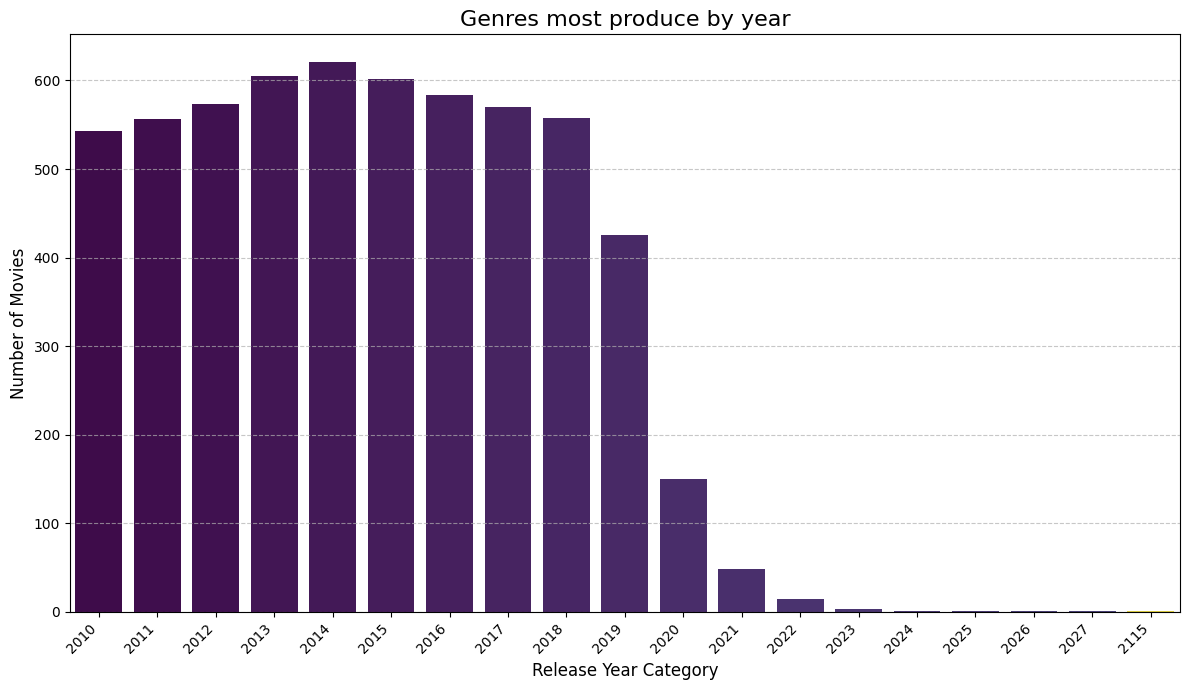

In [371]:
plt.figure(figsize=(12, 7)) # Set the figure size for better readability
sns.barplot(x='start_year', y='distinct_genres', data=df1, palette='viridis',hue='start_year',legend=False)

plt.title('Genres most produce by year', fontsize=16)
plt.xlabel('Release Year Category', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for easier reading
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [372]:
#Nombre de films produits par annee
query2=""" SELECT start_year,COUNT(primary_title) AS numberoffilm_byyear FROM movie_basics GROUP BY start_year"""
df2=pd.read_sql_query(query2,conn)
print(df2)

    start_year  numberoffilm_byyear
0         2010                11849
1         2011                12900
2         2012                13787
3         2013                14709
4         2014                15589
5         2015                16243
6         2016                17272
7         2017                17504
8         2018                16849
9         2019                 8379
10        2020                  937
11        2021                   83
12        2022                   32
13        2023                    5
14        2024                    2
15        2025                    1
16        2026                    1
17        2027                    1
18        2115                    1


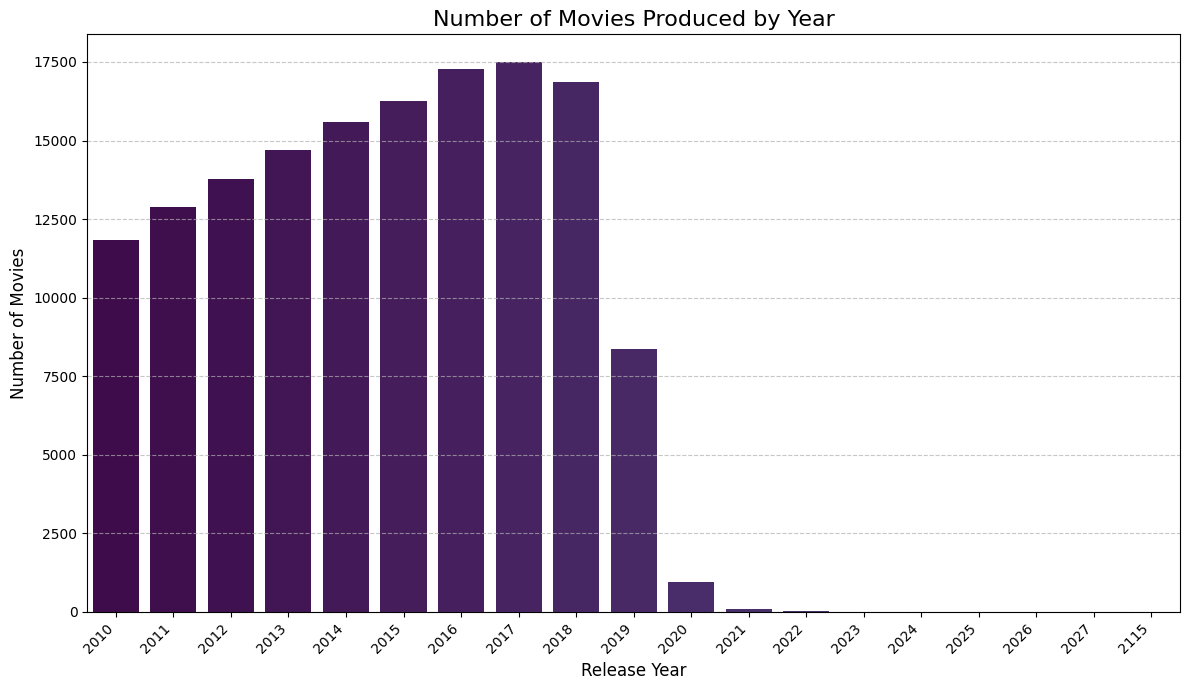

In [373]:
#Graphique sur le nombre de films produits par annee
plt.figure(figsize=(12, 7)) 
sns.barplot(x='start_year', y='numberoffilm_byyear', data=df2, palette='viridis',hue='start_year',legend=False)

plt.title('Number of Movies Produced by Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

In [374]:
#Analyse des notes recues et du genre pour les films avec le plus grand nombre de votes
query3="""SELECT original_title,averagerating,genres,numvotes,start_year FROM movie_basics JOIN movie_ratings USING(movie_id) ORDER BY numvotes DESC LIMIT 20"""
df3=pd.read_sql_query(query3,conn)
print(df3)

                                  original_title  averagerating  \
0                                      Inception            8.8   
1                          The Dark Knight Rises            8.4   
2                                   Interstellar            8.6   
3                               Django Unchained            8.4   
4                                   The Avengers            8.1   
5                        The Wolf of Wall Street            8.2   
6                                 Shutter Island            8.1   
7                        Guardians of the Galaxy            8.1   
8                                       Deadpool            8.0   
9                               The Hunger Games            7.2   
10    Star Wars: Episode VII - The Force Awakens            8.0   
11                            Mad Max: Fury Road            8.1   
12                                     Gone Girl            8.1   
13             The Hobbit: An Unexpected Journey            7.

In [375]:
#Nombre de film par notes recues
query5="""SELECT COUNT(*) AS numberoffilm,averagerating FROM movie_basics INNER JOIN movie_ratings USING(movie_id) GROUP BY averagerating ORDER BY averagerating DESC"""
df5=pd.read_sql_query(query5,conn)
print(df5)

    numberoffilm  averagerating
0             16           10.0
1              5            9.9
2             15            9.8
3             12            9.7
4             18            9.6
..           ...            ...
86            36            1.4
87            29            1.3
88            38            1.2
89            27            1.1
90            65            1.0

[91 rows x 2 columns]


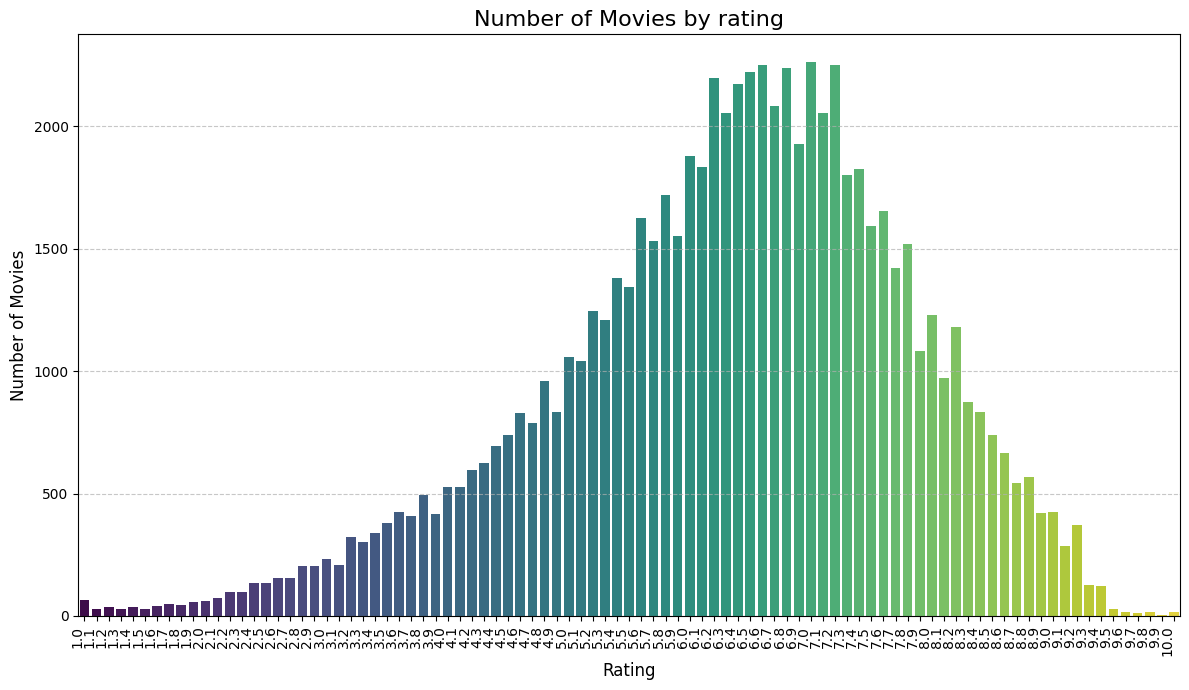

In [376]:
#Graphique sur le nombre de films en fonction de notes fournies par l'ensemble des votants
plt.figure(figsize=(12, 7))
sns.barplot(x='averagerating', y='numberoffilm', data=df5, palette='viridis',hue='averagerating',legend=False)

plt.title('Number of Movies by rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=90, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

In [377]:
dataframe1=pd.read_csv("bom.movie_gross.csv")
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [378]:
#Verifions rapidement les infos de notre dataset
dataframe1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [379]:
# Clean foreign_gross: remove commas and convert to numeric
dataframe1['foreign_gross'] = dataframe1['foreign_gross'].replace('[\$,]', '', regex=True)
dataframe1['foreign_gross'] = pd.to_numeric(dataframe1['foreign_gross'], errors='coerce')

# Drop rows where both domestic and foreign gross are missing
dataframe1 = dataframe1.dropna(subset=['domestic_gross', 'foreign_gross'], how='all')

#Fill missing gross values with 0
dataframe1['domestic_gross'] = dataframe1['domestic_gross'].fillna(0)
dataframe1['foreign_gross'] = dataframe1['foreign_gross'].fillna(0)

# Calculate worldwide gross
dataframe1['worldwide_gross'] = dataframe1['domestic_gross'] + dataframe1['foreign_gross']

#Visualisations

#Top 10 movies by worldwide gross
top10_movies = dataframe1.sort_values(by='worldwide_gross', ascending=False).head(10)

#Top 10 studios by average worldwide gross
top_studios = (
    dataframe1.groupby('studio')['worldwide_gross']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

#Yearly revenue trend (sum of worldwide gross)
yearly_revenue = (
    dataframe1.groupby('year')['worldwide_gross']
    .sum()
    .reset_index()
)

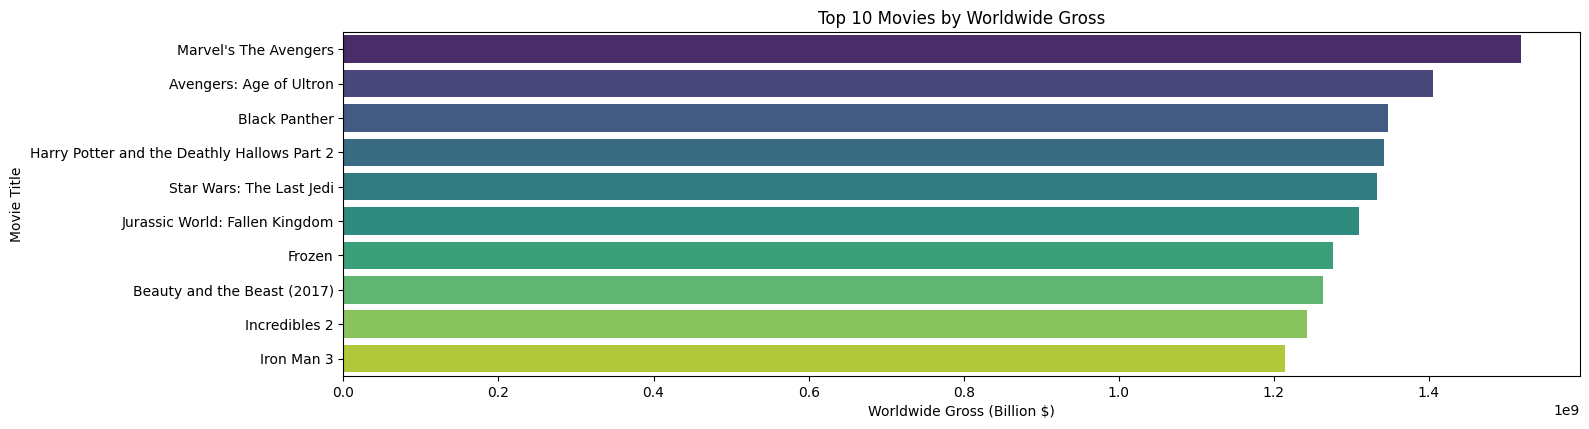

In [380]:
# Set up visualization
plt.figure(figsize=(16, 12))

#Top 10 Movies
plt.subplot(3, 1, 1)
sns.barplot(data=top10_movies, x='worldwide_gross', y='title', palette='viridis',hue='title', legend=False)
plt.title('Top 10 Movies by Worldwide Gross')
plt.xlabel('Worldwide Gross (Billion $)')
plt.ylabel('Movie Title')

plt.tight_layout()
plt.show()

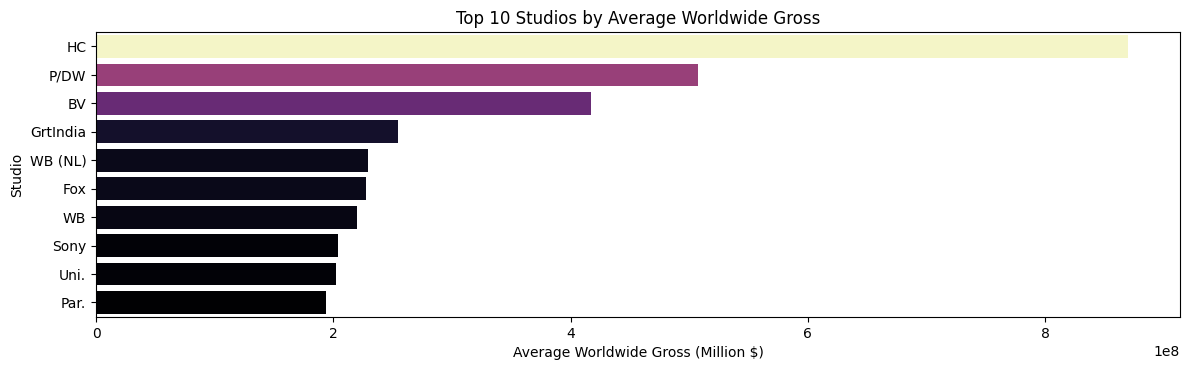

In [385]:
# Set up visualization
plt.figure(figsize=(12, 10))

#Top 10 Studios
plt.subplot(3, 1, 2)
sns.barplot(x=top_studios.values, y=top_studios.index, palette='magma', hue=top_studios.values, legend=False)
plt.title('Top 10 Studios by Average Worldwide Gross')
plt.xlabel('Average Worldwide Gross (Million $)')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Worldwide Gross (Billion $)')

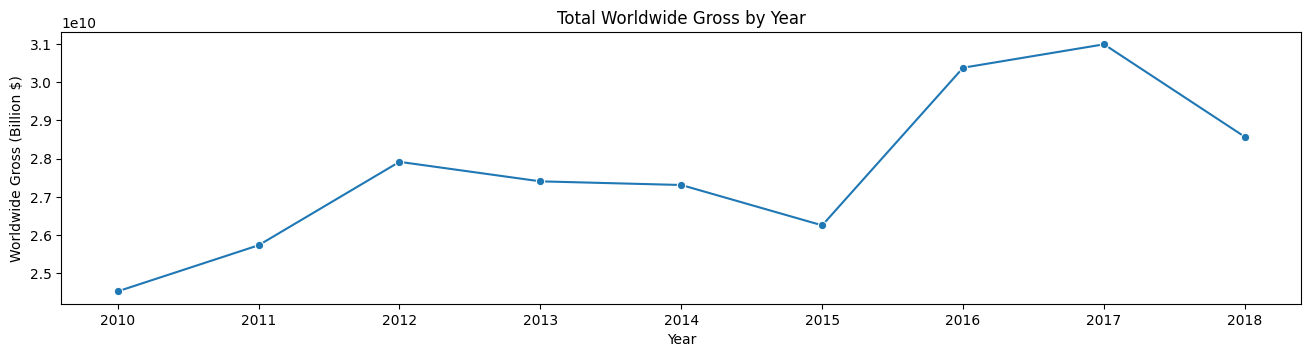

In [382]:
# Set up visualization
plt.figure(figsize=(16, 12))

# Yearly Revenue Trend
plt.subplot(3, 1, 3)
sns.lineplot(data=yearly_revenue, x='year', y='worldwide_gross', marker='o')
plt.title('Total Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (Billion $)')

Equation de la droite: foreign_gross = 1.34 * domestic_gross + 6904613.93


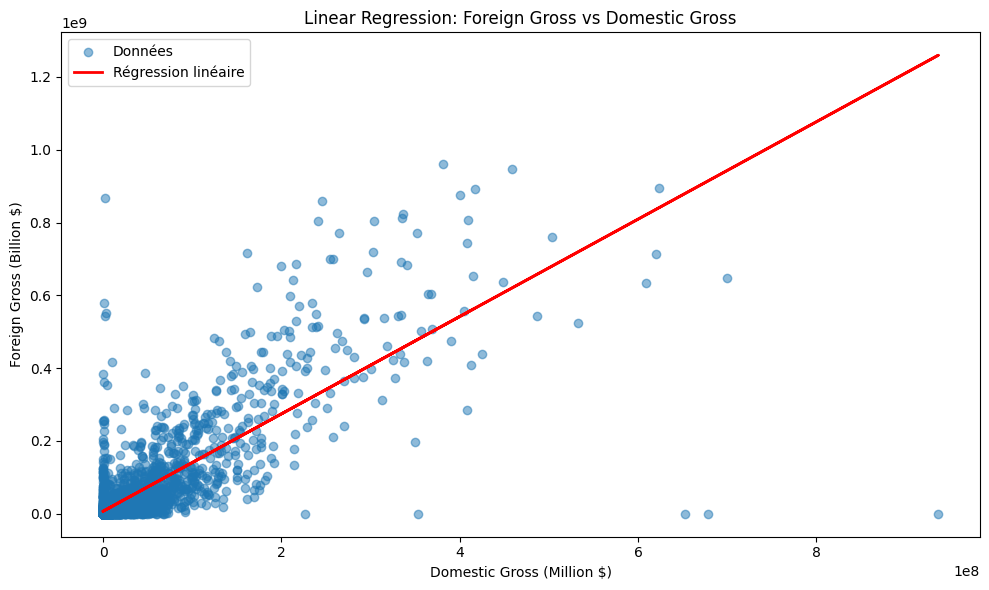

In [386]:
# Faisons une regression lineaire
#Nuage de points pour 2 variables

# Préparation des variables
X = dataframe1[['domestic_gross']]  # Variable indépendante
y = dataframe1['foreign_gross']     # Variable dépendante

# Régression linéaire
model = LinearRegression()
model.fit(X, y)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f"Equation de la droite: foreign_gross = {slope:.2f} * domestic_gross + {intercept:.2f}")

# Concevons le graphique et tracons la droite de régression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Données")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Régression linéaire")
plt.xlabel("Domestic Gross (Million $)")
plt.ylabel("Foreign Gross (Billion $)")
plt.title("Linear Regression: Foreign Gross vs Domestic Gross")
plt.legend()

plt.tight_layout()
plt.show()

In [384]:
# 2. Modèle avec sklearn

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 3. Évaluation du modèle
slope = model.coef_[0]
intercept = model.intercept_
R2 = r2_score(y, y_pred)

print(f"R² (coefficient de détermination) : {R2:.4f}")

# Stats complètes avec statsmodels
X_sm = sm.add_constant(X)  # Ajoute l'intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

R² (coefficient de détermination) : 0.6277
                            OLS Regression Results                            
Dep. Variable:          foreign_gross   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     5706.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):               0.00
Time:                        02:14:07   Log-Likelihood:                -65928.
No. Observations:                3387   AIC:                         1.319e+05
Df Residuals:                    3385   BIC:                         1.319e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

##### R2 equivaut a 62.77%. Donc la variable dependante "domestic_gross" explique a plus de 60% la variable "foreign_gross"

### Business Recommendation 1
#### Develop films that have international crossover potential.
Target International and Global Markets. 
A lot of modern box office revenue often comes from international markets, especially for action, animation, and fantasy.

### Business Recommendation 2
#### Consider films genres that have large audience and have a lot of votes.

### Business Recommendation 3
####  Invest in High-Performing Genres
Adventure, Comedy, Romance, Action, Crime, Drama are the best rates genres of films

### Conclusion
Based on the analysis of the datasets, we identified several key insights to guide our company’s entry into the film production industry. The most financially successful films combine strong domestic and international performance, with animated, action, and adventure genres consistently appearing among the top-grossing titles. Studios such as Buena Vista (Disney) and Warner Bros lead the industry with the highest average global revenues, indicating the strategic value of genre selection, strong branding, and international marketability.
Overall, these findings suggest that beginning with mid-budget, globally appealing genres such as family-friendly animation or thrillers offers a promising pathway into the competitive movie market.

### Next Steps

To build on the insights of this analysis and support informed investment in the cinematography industry we have to follow some steps:

 * Invest in State-of-the-Art Equipment Hubs and Rental Houses: Create or incentivize the establishment of well-stocked, modern equipment rental houses. Develop a Robust Local Talent Incubation and Retention Program. Establish specialized academies or partnerships with film schools focused on cinematography

 * Foster International Co-Production Partnerships and Knowledge Exchange: Actively seek out opportunities for co-productions with countries that have mature film industries. This provides crucial funding, allows local cinematographers and crew to work alongside international teams, learning best practices and advanced techniques.

* Develop a good relation with good writers and experimented directors